<a href="https://colab.research.google.com/github/giovanirojascuela/2025_5TO01/blob/main/TALLER/EXPOSICION/Exposicion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install idx2numpy
!sudo apt-get install tesseract-ocr -y
!pip install pytesseract Pillow

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


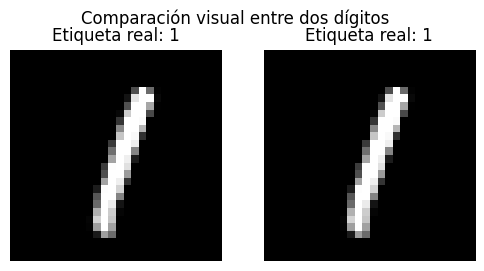

📏 Distancia euclidiana entre imagen 5 y 5: 0.00


In [ ]:
# Mostrar dos imágenes de prueba con etiquetas distintas
idx1 = 5
idx2 = 5

fig, axs = plt.subplots(1, 2, figsize=(6, 3))
axs[0].imshow(X_test[idx1].reshape(28, 28), cmap='gray')
axs[0].set_title(f"Etiqueta real: {y_test[idx1]}")
axs[0].axis('off')

axs[1].imshow(X_test[idx2].reshape(28, 28), cmap='gray')
axs[1].set_title(f"Etiqueta real: {y_test[idx2]}")
axs[1].axis('off')

plt.suptitle("Comparación visual entre dos dígitos")
plt.show()

# Calcular distancia euclidiana entre ambos dígitos
from scipy.spatial.distance import euclidean
dist = euclidean(X_test[idx1], X_test[idx2])
print(f"📏 Distancia euclidiana entre imagen {idx1} y {idx2}: {dist:.2f}")


# Nueva sección

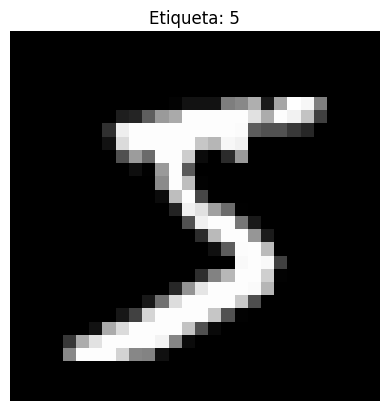

Precisión con KNN (k=3): 0.9190


In [ ]:
# Importar librerías
import idx2numpy
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Cargar archivos ubyte
X_train = idx2numpy.convert_from_file('train-images.idx3-ubyte').reshape(-1, 28*28)
y_train = idx2numpy.convert_from_file('train-labels.idx1-ubyte')
X_test = idx2numpy.convert_from_file('t10k-images.idx3-ubyte').reshape(-1, 28*28)
y_test = idx2numpy.convert_from_file('t10k-labels.idx1-ubyte')

# Visualizar un ejemplo
plt.imshow(X_train[0].reshape(28, 28), cmap='gray')
plt.title(f"Etiqueta: {y_train[0]}")
plt.axis('off')
plt.show()

# Crear y entrenar modelo KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train[:10000], y_train[:10000])  # Entrena con una parte para hacerlo más rápido

# Predecir con imágenes de prueba
y_pred = knn.predict(X_test[:1000])

# Evaluar precisión
acc = accuracy_score(y_test[:1000], y_pred)
print(f"Precisión con KNN (k=3): {acc:.4f}")


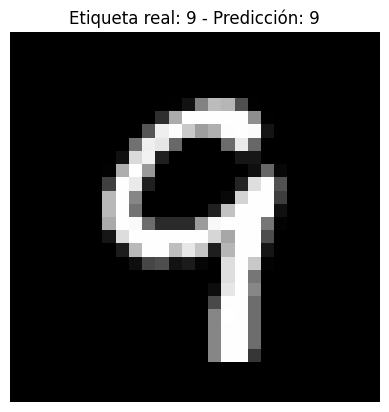

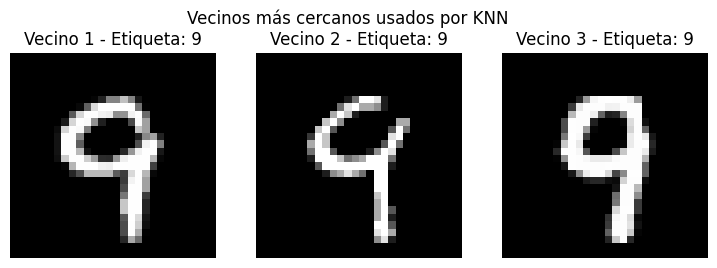

In [ ]:
# Ya entrenamos antes con:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train[:10000], y_train[:10000])

# Elegimos una imagen de prueba
test_idx = 150
img = X_test[test_idx]

# Predicción
pred = knn.predict([img])[0]
neighbors_distances, neighbors_indices = knn.kneighbors([img], n_neighbors=3)

# Mostrar imagen y predicción
plt.imshow(img.reshape(28, 28), cmap='gray')
plt.title(f"Etiqueta real: {y_test[test_idx]} - Predicción: {pred}")
plt.axis('off')
plt.show()

# Mostrar vecinos más cercanos
fig, axs = plt.subplots(1, 3, figsize=(9, 3))
for i, neighbor_idx in enumerate(neighbors_indices[0]):
    axs[i].imshow(X_train[neighbor_idx].reshape(28, 28), cmap='gray')
    axs[i].set_title(f"Vecino {i+1} - Etiqueta: {y_train[neighbor_idx]}")
    axs[i].axis('off')
plt.suptitle("Vecinos más cercanos usados por KNN")
plt.show()


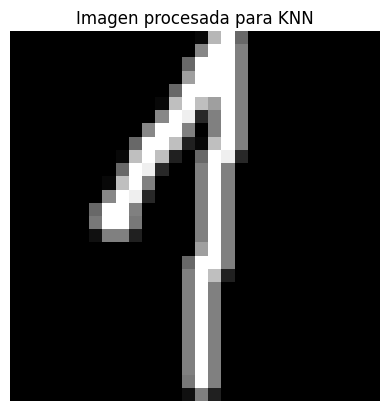

🔍 El modelo KNN predice que el número es: 1


In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# 1. Abrir y convertir a escala de grises
img = Image.open('1.png').convert('L')

# 2. Redimensionar a 28x28 píxeles (como MNIST)
img_resized = img.resize((28, 28))

# 3. Invertir colores si fondo es blanco y número es negro (como MNIST)
img_inverted = Image.eval(img_resized, lambda x: 255 - x)

# 4. Normalizar y aplanar
img_array = np.array(img_inverted) / 255.0
img_flat = img_array.reshape(1, -1)

# 5. Visualizar la imagen procesada
plt.imshow(img_array, cmap='gray')
plt.title("Imagen procesada para KNN")
plt.axis('off')
plt.show()

# 6. Predecir con el modelo KNN entrenado
prediccion = knn.predict(img_flat)
print(f"🔍 El modelo KNN predice que el número es: {prediccion[0]}")

